# region area

In [1]:
#source /export/ciao/bin/ciao.bash -o
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
mkdir -p ./param
ASCDS_WORK_PATH=./


## setup

In [2]:
/bin/rm -rf 13201
download_chandra_obsid 13201 --exclude vvref,osol,eph1


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt1     fits      109 Mb  ####################            1 s  90667.3 kb/s
  asol     fits       11 Mb  ####################          < 1 s  88102.5 kb/s
  evt2     fits        9 Mb  ####################          < 1 s  75904.7 kb/s
  mtl      fits        2 Mb  ####################          < 1 s  46922.6 kb/s
  stat     fits        1 Mb  ####################          < 1 s  37074.5 kb/s
  aqual    fits      759 Kb  ####################          < 1 s  30265.0 kb/s
  cntr_img jpg       599 Kb  ####################          < 1 s  28319.8 kb/s
  bias     fits      435 Kb  ####################          < 1 s  19759.7 kb/s
  bias     fits      433 Kb  ####################          < 1 s  17019.0 kb/s
  bias     fits      432 Kb  ####################          < 1 s  15864.3 kb/s
  bias     fits      430 Kb  ####################    

In [3]:
chandra_repro 13201 out="./" clob+


Running chandra_repro
version: 14 September 2021


Processing input directory '/proj/sds/Staff/kjg/Threads/region_area/13201'

No boresight correction update to asol file is needed.
Resetting afterglow status bits in evt1.fits file...

Running acis_build_badpix and acis_find_afterglow to create a new bad pixel file...

Running acis_process_events to reprocess the evt1.fits file...
Filtering the evt1.fits file by grade and status and time...
Applying the good time intervals from the flt1.fits file...
The new evt2.fits file is: /proj/sds/Staff/kjg/Threads/region_area/acisf13201_repro_evt2.fits

Updating the event file header with chandra_repro HISTORY record
Creating FOV file...
Setting observation-specific bad pixel file in local ardlib.par.

Cleaning up intermediate files

         /proj/sds/Staff/kjg/Threads/region_area/acisf13201_repro_bpix1.fits
         Run 'punlearn ardlib' when analysis of this dataset completed.

The data have been reprocessed.
Start your analysis with the new 

## Make images and other products

In [4]:
dmcopy 'acisf13201_repro_evt2.fits[ccd_id=0:3]' acis_i.evt clob+
fluximage infile=acis_i.evt outroot='abell_665' \
  bands='broad' binsize='2' clob+ verb=1 cleanup=no


Running fluximage
Version: 23 February 2021

Using CSC ACIS broad science energy band.
Aspect solution pcadf13201_000N001_asol1.fits found.
Bad-pixel file acisf13201_repro_bpix1.fits found.
Mask file acisf13201_000N003_msk1.fits found.

The output images will have 1405 by 1408 pixels, pixel size of 0.984 arcsec,
    and cover x=2656.5:5466.5:2,y=2850.5:5666.5:2.

Running tasks in parallel with 4 processors.
Creating aspect histograms for obsid 13201
Creating 4 instrument maps for obsid 13201
Creating 4 exposure maps for obsid 13201
Combining 4 exposure maps for obsid 13201
Thresholding data for obsid 13201
Exposure-correcting image for obsid 13201

The following files were created:

 The clipped counts image is:
     abell_665_broad_thresh.img

 The binned counts image is:
     abell_665_broad.img

 The aspect histograms are:
     abell_665_0.asphist
     abell_665_1.asphist
     abell_665_2.asphist
     abell_665_3.asphist

 The instrument maps are:
     abell_665_0_broad.instmap
    

In [5]:
cat << EOM > abell_665.reg 
# Region file format: DS9 version 4.1
global color=green dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1
fk5
ellipse(8:30:55.337,+65:52:01.94,226.249",260.076",349.593) # color=white width=3
EOM


[1] 55964
[1]+  Done                    ds9 abell_665_broad_thresh.img -block 2 -smooth -scale log -cmap load $ASCDS_CONTRIB/data/purple4.lut -region abell_665.reg -saveimage png ds9_01.png


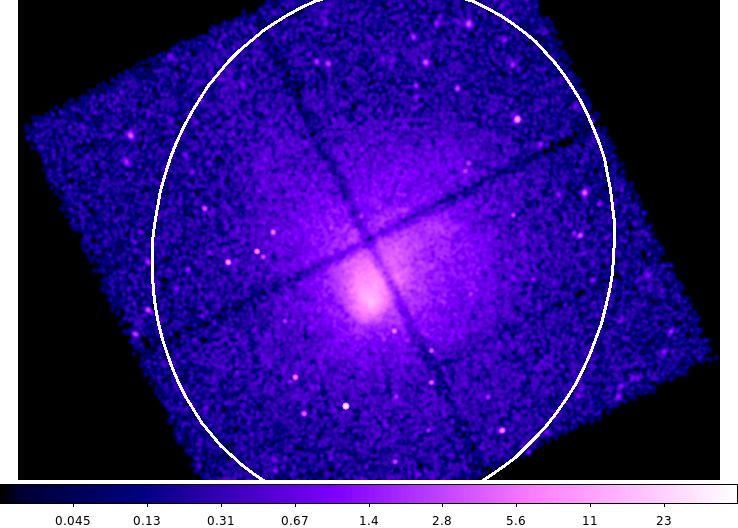

In [6]:
ds9 abell_665_broad_thresh.img -block 2 -smooth -scale log \
  -cmap load $ASCDS_CONTRIB/data/purple4.lut \
  -region abell_665.reg \
  -saveimage png ds9_01.png &
sleep 10
xpaset -p ds9 quit


display < ds9_01.png

In [7]:
dmextract "abell_665_broad_thresh.img[bin sky=region(abell_665.reg)]" \
   dme_output op=generic clob+

In [8]:
dmlist dme_output"[cols area,cel_area]" data,clean

#  AREA                 CEL_AREA
             763648.0    184851.6894720076


In [9]:
echo "3.141592*226.249*260.076" | bc -l

184857.352021759008


## Run dither_region

In [10]:
punlearn ardlib
acis_set_ardlib acisf13201_repro_bpix1.fits abs-

Updated ardlib parameter file: /proj/sds/Staff/kjg/Threads/region_area/param/ardlib.par
  AXAF_ACIS0_BADPIX_FILE -> acisf13201_repro_bpix1.fits[BADPIX0]
  AXAF_ACIS1_BADPIX_FILE -> acisf13201_repro_bpix1.fits[BADPIX1]
  AXAF_ACIS2_BADPIX_FILE -> acisf13201_repro_bpix1.fits[BADPIX2]
  AXAF_ACIS3_BADPIX_FILE -> acisf13201_repro_bpix1.fits[BADPIX3]
  AXAF_ACIS4_BADPIX_FILE -> CALDB
  AXAF_ACIS5_BADPIX_FILE -> CALDB
  AXAF_ACIS6_BADPIX_FILE -> acisf13201_repro_bpix1.fits[BADPIX6]
  AXAF_ACIS7_BADPIX_FILE -> CALDB
  AXAF_ACIS8_BADPIX_FILE -> CALDB
  AXAF_ACIS9_BADPIX_FILE -> CALDB


In [11]:
pset dither_region infile=abell_665_0.asphist
pset dither_region region='region(abell_665.reg)'
pset dither_region outfile=dr_out.fits
pset dither_region maskfile=acisf13201_000N003_msk1.fits
pset dither_region wcsfile=abell_665_broad_thresh.img
pset dither_region maxpix=76000
pset dither_region verbose=0
dither_region mode=h clob+

# dither_region (CIAO 4.14): WARNING: Too many pixels, resetting resolution from 1.000000e+00 to 2.000000e+00

# dither_region (CIAO 4.14): WARNING: Too many pixels, resetting resolution from 2.000000e+00 to 3.000000e+00

# dither_region (CIAO 4.14): WARNING: Too many pixels, resetting resolution from 3.000000e+00 to 4.000000e+00



In [12]:
dmlist dr_out.fits cols

 
--------------------------------------------------------------------------------
Columns for Table Block AREAFRACTION
--------------------------------------------------------------------------------
 
ColNo  Name                 Unit        Type             Range
   1   CAH_REC                           Int4           -                    
   2   POS_OFFSET(X_OFFSET,Y_OFFSET) pix          Real8          -Inf:+Inf            Sky Position
   3   ROLL                 deg          Real8          -Inf:+Inf            Roll angle
   4   FRACAREA                          Real8          -Inf:+Inf            Fraction area
   5   PSFFRAC                           Real8          -Inf:+Inf            PSF fraction
   6   AREA_CHIP_FRAC[10]                Real8(10)      -Inf:+Inf            Region Area Fraction per chip
   7   PSF_CHIP_FRAC[10]                 Real8(10)      -Inf:+Inf            PSF Fraction per chip
   8   STATUS                            Bit[8]                              Why f

### Figure 2: asphist

In [13]:
dmstat abell_665_0.asphist"[cols x_offbin,y_offbin]"

POS_OFFBIN(X_OFFBIN, Y_OFFBIN)[bin]
    min:	( 1 1 )	      @:	( 208 1119 )
    max:	( 44 47 )	      @:	( 582 1 )
   mean:	( 22.149762282 23.689381933 )
  sigma:	( 10.035384897 10.431431752 )
    sum:	( 27953 29896 )
   good:	( 1262 1262 )
   null:	( 0 0 )



In [14]:
dmcopy "abell_665_0.asphist[bin x_offbin=0:45:1,y_offbin=0:48:1;duration]" asphist.img clob+ 

[1] 56280
[1]+  Done                    ds9 asphist.img -scale asinh -zoom to fit -cmap load $ASCDS_CONTRIB/data/gem-256.lut -saveimage png ds9_02.png


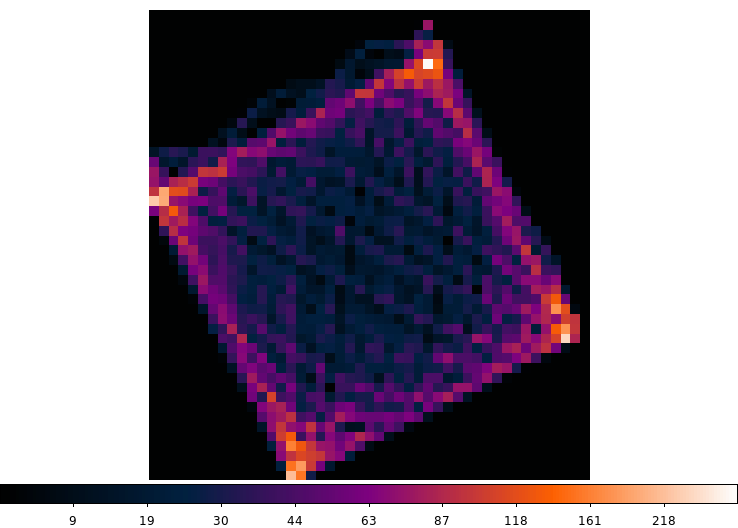

In [15]:
ds9 asphist.img -scale asinh -zoom to fit \
  -cmap load $ASCDS_CONTRIB/data/gem-256.lut \
  -saveimage png ds9_02.png &
sleep 10
xpaset -p ds9 quit


display < ds9_02.png

In [16]:
cat << EOM > p1.py
from pycrates import read_file
dr = read_file('dr_out.fits')
asp = read_file('abell_665_0.asphist')
fracarea = dr.get_column("fracarea").values
duration = asp.get_column("duration").values
print(sum(fracarea*duration) / sum(duration))
EOM

python p1.py

0.8825479009281537


## Account for surface brightness

In [17]:
aconvolve abell_665_broad_flux.img sm_flux.img 'lib:gaus(2,5,5,3,3)' \
  method=fft clobber=yes

In [18]:
dmstat "sm_flux.img[sky=region(abell_665.reg)]"  centroid- sig- med- verb=0
tot=`pget dmstat out_sum`
echo $tot

0.0054683361244


In [19]:
dmimgcalc "sm_flux.img[sky=region(abell_665.reg)]" none model.fits \
    op="imgout=(img1/${tot})" clob+

[1] 56374
[1]+  Done                    ds9 model.fits -block 2 -smooth -scale asinh -cmap load $ASCDS_CONTRIB/data/purple4.lut -saveimage png ds9_03.png


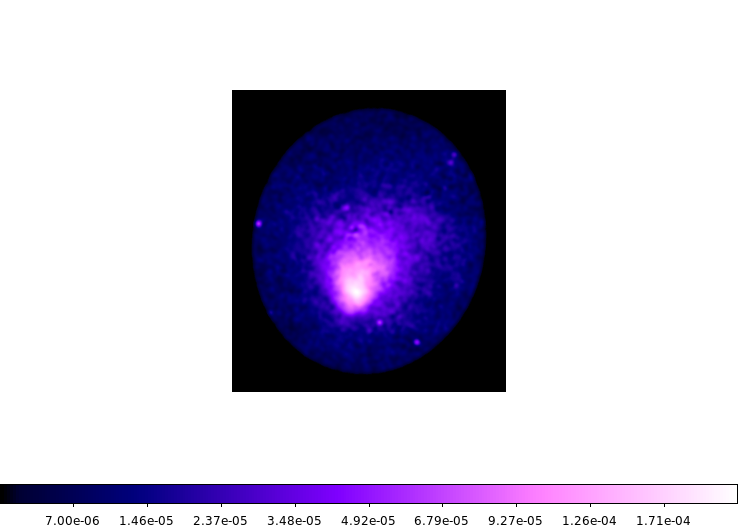

In [20]:
ds9 model.fits -block 2 -smooth -scale asinh \
  -cmap load $ASCDS_CONTRIB/data/purple4.lut \
  -saveimage png ds9_03.png &
sleep 10
xpaset -p ds9 quit


display < ds9_03.png

In [21]:
pset dither_region psffile=model.fits
dither_region outfile=dr_with_model.fits mode=h verbose=0 clob+

# dither_region (CIAO 4.14): WARNING: Too many pixels, resetting resolution from 1.000000e+00 to 2.000000e+00

# dither_region (CIAO 4.14): WARNING: Too many pixels, resetting resolution from 2.000000e+00 to 3.000000e+00

# dither_region (CIAO 4.14): WARNING: Too many pixels, resetting resolution from 3.000000e+00 to 4.000000e+00



In [22]:
dmlist dr_with_model.fits cols | grep PSF

   5   PSFFRAC                           Real8          -Inf:+Inf            PSF fraction
   7   PSF_CHIP_FRAC[10]                 Real8(10)      -Inf:+Inf            PSF Fraction per chip


In [23]:
cat << EOM > p2.py
from pycrates import read_file
dr = read_file('dr_with_model.fits')
asp = read_file('abell_665_0.asphist')
psffrac = dr.get_column("psffrac").values
duration = asp.get_column("duration").values
print(sum(psffrac*duration) / sum(duration))
EOM

python p2.py

0.8683222776348839


# Cleanup

In [24]:
/bin/rm -rf 13201
/bin/rm -f acisf* pcadf*
